In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [4]:
df = pd.read_csv('dataset_part_2.csv')
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [18]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
dtype: object

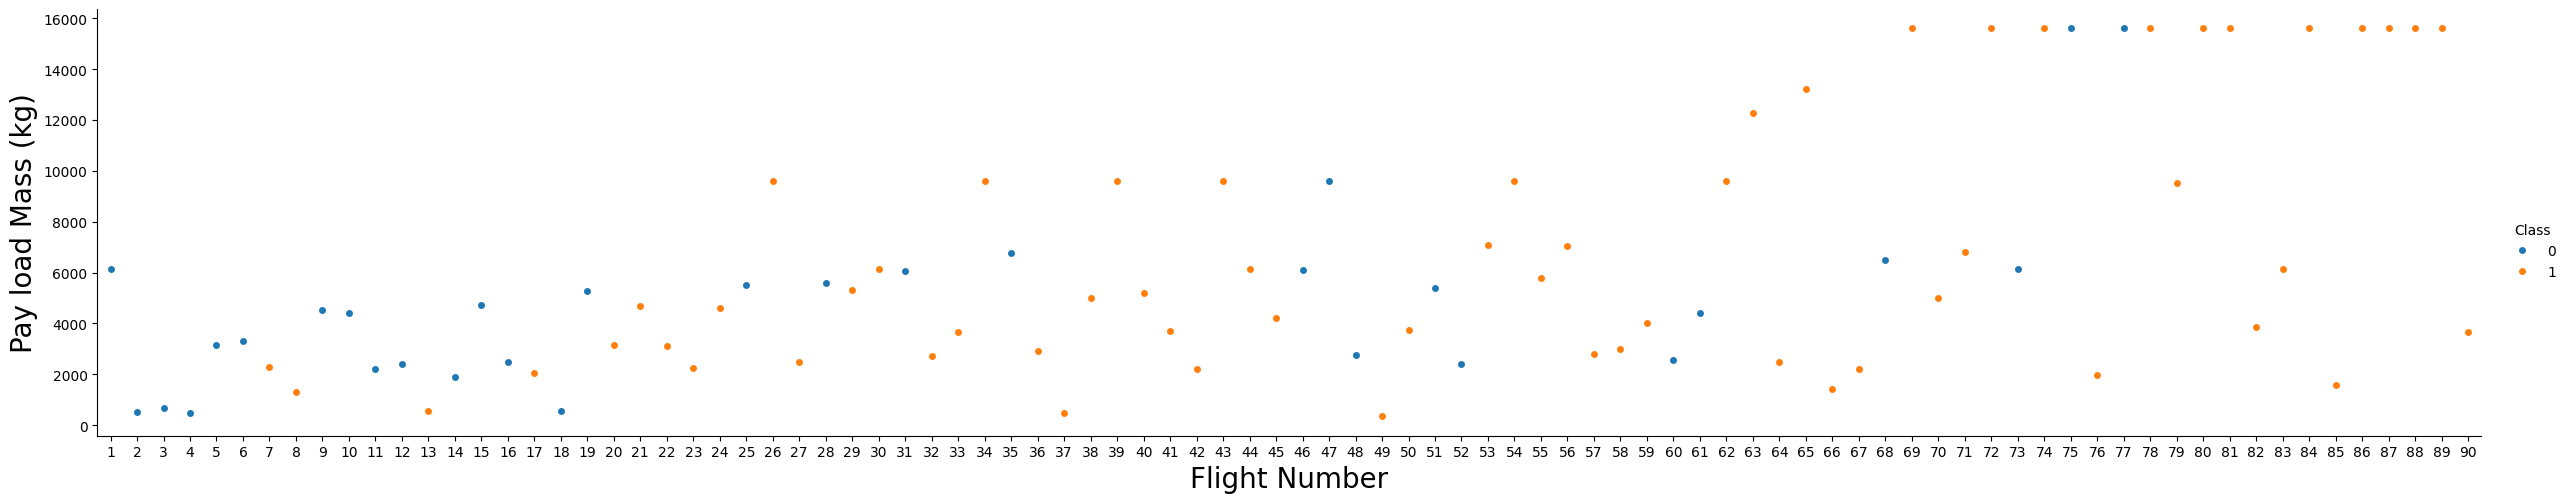

In [6]:
# How the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

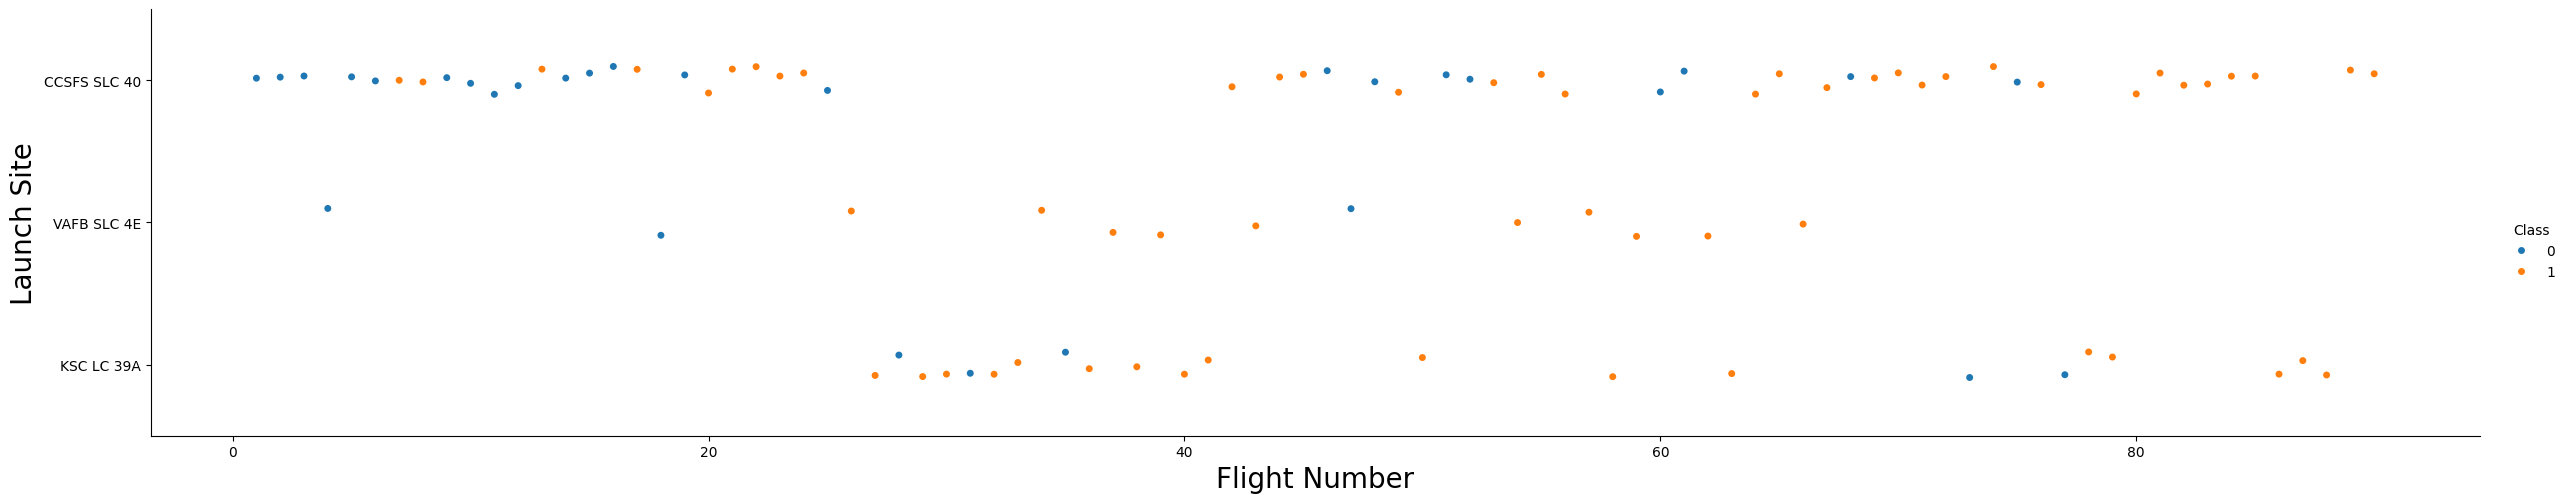

In [99]:
# relationship between FlightNumber and launch site
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

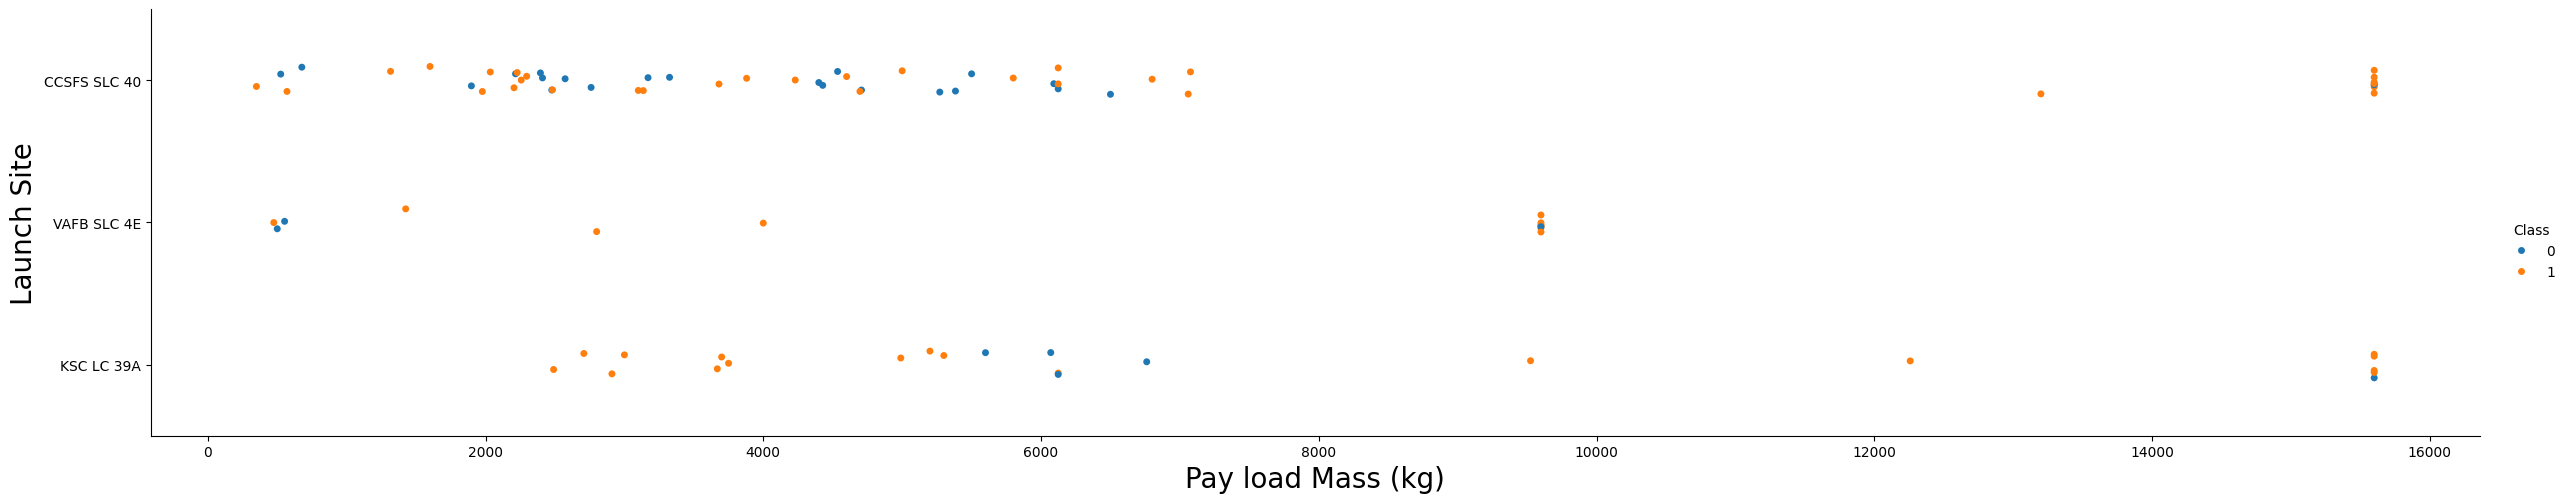

In [58]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

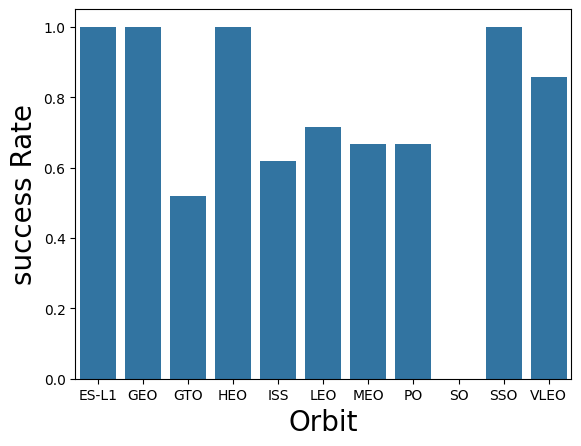

In [46]:
plot_os = df.groupby(['Orbit']).mean(['Class'])
plot_os.reset_index(inplace=True)
sns.barplot(y='Class', x="Orbit", data=plot_os)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("success Rate",fontsize=20)
plt.show()

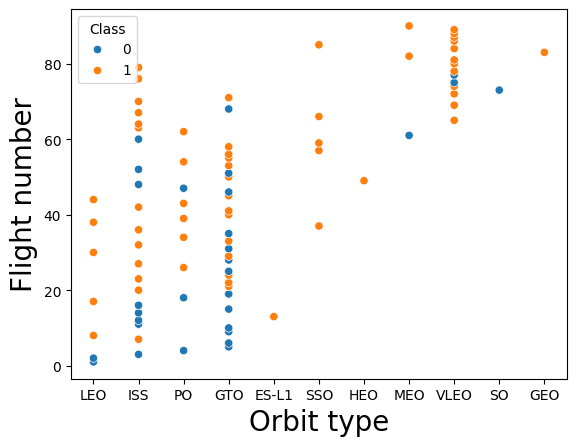

In [56]:
sns.scatterplot(y="FlightNumber", x="Orbit", hue="Class", data=df)
plt.xlabel("Orbit type",fontsize=20)
plt.ylabel("Flight number",fontsize=20)
plt.show()

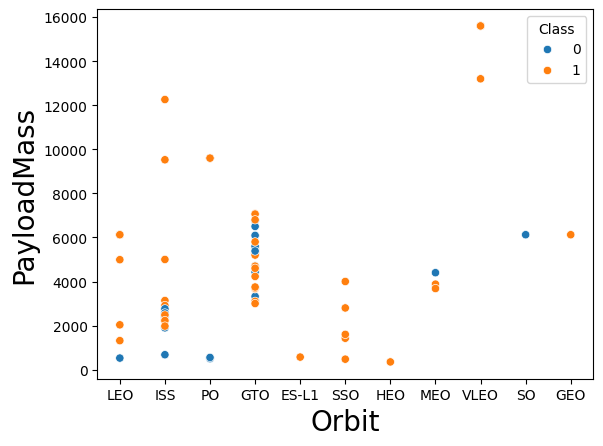

In [55]:
sns.scatterplot(x="Orbit",y="PayloadMass",hue="Class",data = df)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("PayloadMass",fontsize=20)
plt.show()

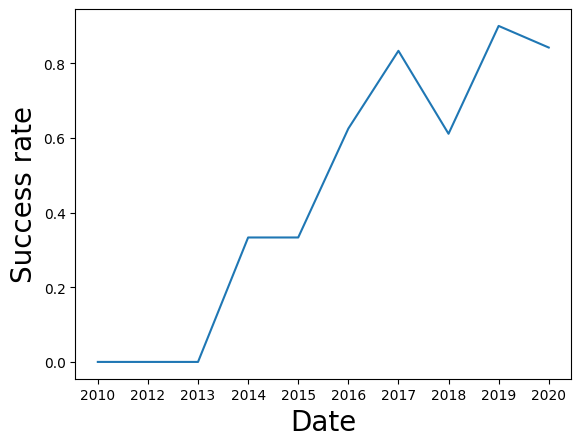

In [64]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year

# Group by year with success rate
plot_yearly = df.groupby(['Date']).mean(['Class'])
plot_yearly.reset_index(inplace=True)

sns.lineplot(x="Date",y="Class",data = plot_yearly)
plt.xlabel("Date",fontsize=20)
plt.ylabel("Success rate",fontsize=20)
plt.show()



In [66]:
# select features that will be used in success prediction
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

In [67]:
features.dtypes

FlightNumber      int64
PayloadMass     float64
Orbit            object
LaunchSite       object
Flights           int64
GridFins           bool
Reused             bool
Legs               bool
LandingPad       object
Block           float64
ReusedCount       int64
Serial           object
dtype: object

In [77]:
# Create dummy variables
features_one_hot = features.copy()

features_one_hot = pd.concat([features_one_hot, pd.get_dummies(features_one_hot['Orbit'], prefix='category')], axis=1)
features_one_hot = pd.concat([features_one_hot, pd.get_dummies(features_one_hot['LaunchSite'], prefix='category')], axis=1)
features_one_hot = pd.concat([features_one_hot, pd.get_dummies(features_one_hot['LandingPad'], prefix='category')], axis=1)
features_one_hot = pd.concat([features_one_hot, pd.get_dummies(features_one_hot['Serial'], prefix='category')], axis=1)


In [97]:
features_one_hot.shape

(90, 84)

In [94]:
features_one_hot.dtypes.head(15)

FlightNumber      float64
PayloadMass       float64
Orbit              object
LaunchSite         object
Flights           float64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount       float64
Serial             object
category_ES-L1       bool
category_GEO         bool
category_GTO         bool
dtype: object

In [93]:
features_one_hot['FlightNumber'] = features_one_hot['FlightNumber'].astype('float64')
features_one_hot['Flights'] = features_one_hot['Flights'].astype('float64')
features_one_hot['ReusedCount'] = features_one_hot['ReusedCount'].astype('float64')

In [95]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)